In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [43]:
data_1=pd.read_csv('dataset.csv')
data_2=pd.read_csv('UnicefDataset2.csv')
#data_1.columns = [''] * len(data_1.columns)
data_1 = data_1.replace('NaN', np.nan)
data_1 = data_1.replace('âˆ’', np.nan)
data_1['Happy Planet Index'] = np.nan
countries=list(data_1['Country'])
data_1

,Country,Region,Gross National Income (GNI),fin_inc_male,fin_inc_female,urban_labour_part_male,urban_labour_part_female,rural_labour_part_male,rural_labour_part_female,total_labour_part_male,total_labour_part_female,family_planning_demand_female(15-49),family_planning_demand_female(15-19),gov_exp_health,gov_exp_education,births_by_18,Happy Planet Index
0,Afghanistan,Middle East and North Africa,Low,23.0,7.0,71.0,16.0,74.0,23.0,73.0,21.0,42.0,21.0,0.5,3.2,20.0,NaN
1,Albania,Post-communist,Upper-Middle,42.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,2.9,3.4,3.0,NaN
2,Algeria,Middle East and North Africa,Upper-Middle,56.0,29.0,57.0,15.0,65.0,10.0,60.0,13.0,77.0,NaN,4.9,NaN,1.0,NaN
3,Andorra,Europe,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.3,NaN,NaN
4,Angola,Sub Saharan Africa,Lower-Middle,36.0,22.0,73.0,63.0,89.0,90.0,80.0,75.0,30.0,15.0,1.4,3.5,38.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,Americas,Upper-Middle,77.0,70.0,69.0,46.0,76.0,32.0,69.0,45.0,NaN,NaN,2.0,NaN,24.0,NaN
198,Vietnam,Asia Pacific,Lower-Middle,31.0,30.0,74.0,63.0,85.0,77.0,81.0,72.0,70.0,60.0,2.4,5.7,5.0,NaN
199,Yemen,Middle East and North Africa,Low,11.0,2.0,66.0,8.0,65.0,5.0,65.0,6.0,38.0,22.0,0.6,NaN,17.0,NaN
200,Zambia,Sub Saharan Africa,Lower-Middle,52.0,40.0,59.0,36.0,34.0,20.0,45.0,28.0,62.0,57.0,2.1,NaN,31.0,NaN


In [44]:
happy_planet=pd.read_excel('hpi-data-2016.xlsx',sheet_name=4)
happy_planet=happy_planet[0:140]
del happy_planet['Unnamed: 0']
happy_planet=happy_planet.sort_values(by=['Country'])
happy_planet = happy_planet.replace('Data unavailable', np.nan)
happy_planet.head()

,HPI Rank,Country,Region,Average Life \nExpectancy,Average Wellbeing\n(0-10),Happy Life Years,Footprint\n(gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita\n($PPP),Population,GINI index
0,110.0,Afghanistan,Middle East and North Africa,59.668,3.8,12.396024,0.79,0.426557,38.348818,3.390494,20.225350,690.842629,29726803.0,NaN
1,13.0,Albania,Post-communist,77.347,5.5,34.414736,2.21,0.165134,69.671159,5.097650,36.766874,4247.485437,2900489.0,28.96
2,30.0,Algeria,Middle East and North Africa,74.313,5.6,30.469461,2.12,0.244862,60.474545,5.196449,33.300543,5583.616160,37439427.0,NaN
3,19.0,Argentina,Americas,75.927,6.5,40.166674,3.14,0.164238,68.349583,6.034707,35.190244,14357.411589,42095224.0,42.49
4,73.0,Armenia,Post-communist,74.446,4.3,24.018760,2.23,0.216648,66.921682,3.747140,25.666417,3565.517575,2978339.0,30.48


In [45]:
#Find countries that have Happy Planet Index
for i in range(len(happy_planet.index)):
    country=happy_planet['Country'][i]
    if country in countries:
        c=data_1[data_1.Country.str.contains(country,case=False)].index
        data_1['Happy Planet Index'][c]=happy_planet['Happy Planet Index'][i]
#Remove rows with all NaN values
data_1=data_1.drop(columns=['Country','Region','Gross National Income (GNI)'])
data_1

/Users/conorbarrycullen/miniconda3/envs/stan/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fin_inc_male,fin_inc_female,urban_labour_part_male,urban_labour_part_female,rural_labour_part_male,rural_labour_part_female,total_labour_part_male,total_labour_part_female,family_planning_demand_female(15-49),family_planning_demand_female(15-19),gov_exp_health,gov_exp_education,births_by_18,Happy Planet Index
0,23.0,7.0,71.0,16.0,74.0,23.0,73.0,21.0,42.0,21.0,0.5,3.2,20.0,20.225350
1,42.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,2.9,3.4,3.0,36.766874
2,56.0,29.0,57.0,15.0,65.0,10.0,60.0,13.0,77.0,NaN,4.9,NaN,1.0,33.300543
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.3,NaN,NaN
4,36.0,22.0,73.0,63.0,89.0,90.0,80.0,75.0,30.0,15.0,1.4,3.5,38.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,77.0,70.0,69.0,46.0,76.0,32.0,69.0,45.0,NaN,NaN,2.0,NaN,24.0,33.569960
198,31.0,30.0,74.0,63.0,85.0,77.0,81.0,72.0,70.0,60.0,2.4,5.7,5.0,40.307589
199,11.0,2.0,66.0,8.0,65.0,5.0,65.0,6.0,38.0,22.0,0.6,NaN,17.0,NaN
200,52.0,40.0,59.0,36.0,34.0,20.0,45.0,28.0,62.0,57.0,2.1,NaN,31.0,25.224246


In [46]:
#Find number of NaN values in columns
col_list=list(data_1.isna().sum())
print(col_list)


print('Column with greatest NaN values: ' + str(data_1.columns[col_list.index(max(col_list))]))
col_list[col_list.index(max(col_list))]=0
print('Column with second greatest NaN values: ' + str(data_1.columns[col_list.index(max(col_list))]))
#Remove column
data_1=data_1.drop(columns=['family_planning_demand_female(15-19)'])


#Find number of NaN values in other rows when value of column is also NaN
complist=[]
for i in range(len(data_1.columns)):
    #Select column
    col=data_1.iloc[:,i]
    ind=col.index
    other_cols=[x for x,y in enumerate(data_1.columns) if y is not data_1.columns[i]]
    #Counter for nan values
    count=0
    for j in ind:
        for k in other_cols:
            r=np.array([data_1.iloc[j][k]], dtype=np.float64)
            if np.isnan(r):
                count+=1
    complist.append(count)
        
print(complist)


print('Column with most NaN values in other columns: ' + str(data_1.columns[complist.index(max(complist))]))
complist[complist.index(max(complist))]=0
print('Column with second most NaN values in other columns: ' + str(data_1.columns[complist.index(max(complist))]))
#Remove column
data_1=data_1.drop(columns=['gov_exp_health'])


[47, 47, 66, 66, 67, 67, 66, 66, 72, 122, 16, 48, 86, 71]
Column with greatest NaN values: family_planning_demand_female(15-19)
Column with second greatest NaN values: births_by_18
[738, 738, 719, 719, 718, 718, 719, 719, 713, 769, 737, 699, 714]
Column with most NaN values in other columns: gov_exp_health
Column with second most NaN values in other columns: fin_inc_male


In [47]:

#data_1 = data_1.dropna(how='all').reset_index(drop=True)
data_1 = data_1.dropna().reset_index(drop=True)
data_1

,fin_inc_male,fin_inc_female,urban_labour_part_male,urban_labour_part_female,rural_labour_part_male,rural_labour_part_female,total_labour_part_male,total_labour_part_female,family_planning_demand_female(15-49),gov_exp_education,births_by_18,Happy Planet Index
0,23.0,7.0,71.0,16.0,74.0,23.0,73.0,21.0,42.0,3.2,20.0,20.225350
1,56.0,41.0,68.0,48.0,74.0,61.0,71.0,53.0,37.0,2.8,1.0,25.666417
2,65.0,36.0,81.0,31.0,80.0,39.0,81.0,36.0,73.0,1.5,36.0,38.390694
3,44.0,52.0,77.0,57.0,81.0,41.0,79.0,49.0,66.0,6.7,17.0,33.839843
4,49.0,29.0,70.0,65.0,78.0,73.0,74.0,70.0,26.0,4.4,19.0,13.422365
5,39.0,28.0,75.0,46.0,70.0,60.0,71.0,56.0,85.0,7.4,15.0,28.623233
6,55.0,54.0,76.0,58.0,91.0,77.0,80.0,64.0,50.0,7.3,20.0,23.321493
7,51.0,35.0,69.0,55.0,77.0,59.0,75.0,58.0,56.0,4.2,28.0,17.886188
8,8.0,7.0,69.0,55.0,79.0,83.0,78.0,80.0,38.0,6.4,13.0,15.576159
9,22.0,22.0,85.0,70.0,89.0,78.0,88.0,76.0,57.0,1.9,7.0,25.649373


In [29]:
X = data_1.drop("Happy Planet Index", 1)       # feature matrix 
y = data_1['Happy Planet Index']               # target feature
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

print('Forward Selection Best Features: ' + str(forward_selection(X.astype(float),y)))
print('Backward Elimination Best Features: ' + str(backward_elimination(X.astype(float),y)))

/Users/conorbarrycullen/miniconda3/envs/stan/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Forward Selection Best Features: ['family_planning_demand_female(15-49)', 'total_labour_part_female']
Backward Elimination Best Features: ['rural_labour_part_female', 'family_planning_demand_female(15-49)']


In [30]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=11,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

('fin_inc_male',
 'fin_inc_female',
 'urban_labour_part_male',
 'urban_labour_part_female',
 'rural_labour_part_male',
 'rural_labour_part_female',
 'total_labour_part_male',
 'total_labour_part_female',
 'family_planning_demand_female(15-49)',
 'gov_exp_education',
 'births_by_18')

/Users/conorbarrycullen/miniconda3/envs/stan/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/conorbarrycullen/miniconda3/envs/stan/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


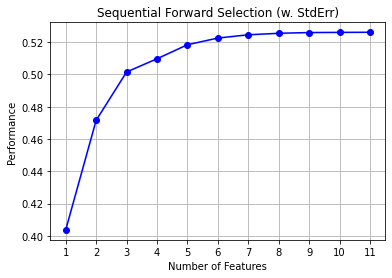

In [31]:
#Plot the 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#Regression plot of most important features
feature_1='family_planning_demand_female(15-49)'
feature_2='rural_labour_part_female'
neat_feature_1='Family Planning Demand (Fem.)'
neat_feature_2='Rural Labour Participation (Fem.)'

def reg_plot(feature):
    #Feature
    Xn = data_1[feature].values.reshape(-1,1)
    #Target variable
    yn = data_1['Happy Planet Index'].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.9, random_state=0)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    y_pred = regressor.predict(X_test)

    #To retrieve the intercept:
    print(regressor.intercept_)
    #For retrieving the slope:
    print(regressor.coef_)
    return regressor,X_train, X_test, y_train, y_test, y_pred
    
reg1,x_train1,x_test1,y_train1,y_test1,y_pred1=reg_plot(feature_1)
reg2,x_train2,x_test2,y_train2,y_test2,y_pred2=reg_plot(feature_2)

[4.50229723]
[[0.34362744]]
[25.19635422]
[[-0.02010607]]


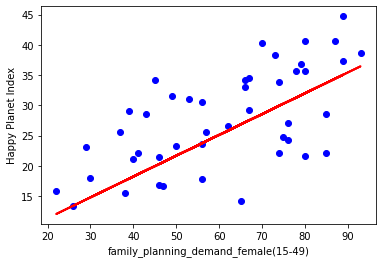

Mean Absolute Error: 5.829366972219498
Mean Squared Error: 46.999980358241324
Root Mean Squared Error: 6.855653167878414
R squared =  0.28614409359199733


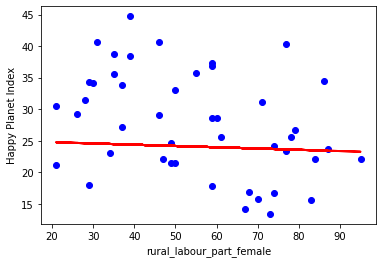

Mean Absolute Error: 7.161061953528082
Mean Squared Error: 77.26041779599083
Root Mean Squared Error: 8.789790543351465
R squared =  -0.17346443881113505


In [33]:
plt.scatter(x_test1, y_test1,  color='blue')
plt.plot(x_test1, y_pred1, color='red', linewidth=2)
plt.xlabel(feature_1)
plt.ylabel('Happy Planet Index')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
#Correlation coefficient
print('R squared = ',metrics.r2_score(y_test1, y_pred1))

plt.scatter(x_test2, y_test2,  color='blue')
plt.plot(x_test2, y_pred2, color='red', linewidth=2)
plt.xlabel(feature_2)
plt.ylabel('Happy Planet Index')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
#Correlation coefficient
print('R squared = ', metrics.r2_score(y_test2, y_pred2))




In [34]:
#Multiple Linear Regression
X = data_1[[feature_1,feature_2]]
y = data_1['Happy Planet Index']

# with sklearn
regr = LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

'''
# Use for predicting new values
New_Family_Planning_Demand=
New_Total_Labour_Part=
print ('Predicted HPI: \n', regr.predict([[New_Family_Planning_Demand ,New_Total_Labour_Part]]))
'''

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)




Intercept: 
 16.43470532788344
Coefficients: 
 [ 0.26409546 -0.09348975]
                            OLS Regression Results                            
Dep. Variable:     Happy Planet Index   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     20.37
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.26e-07
Time:                        16:11:18   Log-Likelihood:                -158.96
No. Observations:                  50   AIC:                             323.9
Df Residuals:                      47   BIC:                             329.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/Users/conorbarrycullen/miniconda3/envs/stan/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:

import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg



X = data_1[[feature_1,feature_2]]
y = data_1['Happy Planet Index']
# with sklearn
regr = LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type '+str(neat_feature_1)+': ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text='Type '+str(neat_feature_2)+': ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_Family_Planning_Demand #our 1st input variable
    New_Family_Planning_Demand = float(entry1.get()) 
    
    global New_Total_Labour_Part #our 2nd input variable
    New_Total_Labour_Part = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Happy Planet Index: ', regr.predict([[New_Family_Planning_Demand ,New_Total_Labour_Part]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Happy Planet Index',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(data_1[feature_1].astype(float),data_1['Happy Planet Index'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Happy Planet Index']) 
ax3.set_xlabel(neat_feature_1)
ax3.set_title(str(neat_feature_1)+ ' vs. Happy Planet Index')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(data_1[feature_2].astype(float),data_1['Happy Planet Index'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Happy Planet Index']) 
ax4.set_xlabel(neat_feature_2)
ax4.set_title(str(neat_feature_2)+ ' vs. Happy Planet Index')

root.mainloop()

Intercept: 
 16.43470532788344
Coefficients: 
 [ 0.26409546 -0.09348975]
